# New Design
A new design for dYdX rewards that incentivizes traders to trade throughout the epoch, rather than just at the end.

In [18]:
!pip3 install --q scipy matplotlib

In [66]:
import scipy.integrate as integrate
import math

In [73]:
# hard coded values
R = 3_835_616 # total DYDX reward at end of each epoch
T = 24 * 28   # number of hours in an epoch
T_R = T + 8 * 24 # number of hours until rewards are received
p = lambda t: 6.5 # price, as a function of time; e.g. p(2.1) would mean 2.1 after the beginning of the epoch
r_ann = 0.02 # risk free annual rate of return


# derived values
r_hour = (1+r_ann)**(1/(24*365)) - 1 # risk free hourly rate of return

N_prime = lambda t: R * p(t) / T # the derivative of the expected nominal payout at time t
N_ab = lambda a, b: integrate.quad(N_prime, a, b)[0] # expected nominal payout between time a and time b
N = lambda t: N_ab(0, t) # expected nominal payout by time t

D_prime = lambda t: N_prime(t) * (1 + r_hour)**(-(T_R - t)) # the derivative of the expected real payout at time t; it's discounted for risk-free rate
D_ab = lambda a, b: integrate.quad(D_prime, a, b)[0] # expected real payout between time a and time b; it's discounted for the risk-free rate
D = lambda t: D_ab(0, t) # expected real payout by time t; it's discounted for the risk-free rate

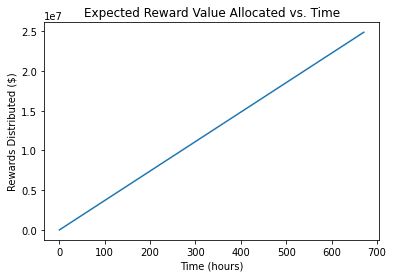

In [74]:
import matplotlib.pyplot as plt

pts = []
for hour in range(T):
    a = D(hour)
    pts.append(a)
plt.plot(pts)
plt.title("Expected Reward Value Allocated vs. Time")
plt.ylabel("Rewards Distributed ($)")
plt.xlabel("Time (hours)");

This gives the expected amount of reward _value_ allocated as the epoch progresses. Keep in mind that allocated does _not_ mean that it is physically given to participants; instead, this graph represents the _expectation_ of market participants on how much of the token value has been earmarked at a particular time via the mechanism, even though none of those participants (and, in fact, nobody at all) truly knows how much of the protocol value has been allocated by that time.

Now let's take on the following assumptions: **In any time interval in the epoch, all traders are rational and seek only to maximize their profits (in current real terms) from the trading mechanism. Current real terms just means that they are not performing prediction on the DYDX price.**

This assumption, combined with the jupyter notebook linked, means that traders converge in real-time to an optimal fee payment equilibrium (`end_of_epoch_sim.ipynb`). No trader has an incentive to deviate from this, and all traders get trading rewards profits! This equilibrium can be found via simulation of equlibrium-seeking behavior and optimization :).

<!-- This assumption is equivalent to rejecting the statement "traders will not pay past profit maximiz and they will not pay fewer in fees than the amount that they expect to see in rewards". The former part of this statement seems obvious, since if a trader wants to buy DYDX, they can do so via an exchange rather than through this roundabout rewards mechanism. The latter part of this statement is harder to agree with: why would a trader pay up to the amount in fees that they would receive in rewards? -->

In [75]:
# TODO: copy in code that uses open interest (and staking!) data to compute the optimal fees paid.
# My guess is that the addition of staking actually does not make this any more difficulat, but instead
# of finding a open-interest:fee ratio, we'll just need to find a open-interest-and-staking-combo-score:fee
# ratio.